In [1]:
from pandas import DataFrame

from src.data.dataset import AudioDataset
import pandas as pd

import sys
sys.path.append('..')

%load_ext autoreload
# We use the development dataset for this example:
base_dir = '../data/dev/training'
metadata_df: DataFrame | None = pd.read_csv('../data/dev/training/metadata.tsv', sep='\t', names=['file_reference', 'start_time', 'end_time', 'label'])


dataset = AudioDataset(base_dir, metadata_df, batch_size=4,)

searching for wav_files


In [2]:
metadata_df

,file_reference,start_time,end_time,label,file_name
0,./data/dev/training/Rumble/0/0.wav,10.0000,13.1030,Rumble,Rumble_0_0.wav
1,./data/dev/training/Rumble/0/1.wav,10.0000,13.3250,Rumble,Rumble_0_1.wav
2,./data/dev/training/Rumble/0/2.wav,10.0000,20.0000,Rumble,Rumble_0_2.wav
3,./data/dev/training/Rumble/0/3.wav,10.0000,12.1060,Rumble,Rumble_0_3.wav
4,./data/dev/training/Rumble/0/3.wav,14.3600,16.8350,Rumble,Rumble_0_3.wav
...,...,...,...,...,...
1366,./data/dev/training/Gunshot/0/93.wav,10.0000,10.9157,Gunshot,Gunshot_0_93.wav
1367,./data/dev/training/Gunshot/0/93.wav,11.2741,12.1899,Gunshot,Gunshot_0_93.wav
1368,./data/dev/training/Gunshot/0/94.wav,8.7259,9.6416,Gunshot,Gunshot_0_94.wav
1369,./data/dev/training/Gunshot/0/94.wav,10.0000,10.9158,Gunshot,Gunshot_0_94.wav


In [3]:
events = metadata_df[metadata_df['file_reference'] == './data/dev/training/Rumble/0/2.wav']



In [4]:
# The datagenerator is an iterable object that returns a dict with keys sample_rate, data and label
sample_rate, data, label = dataset[0]
print(f'sample_rate: {sample_rate}, data: {data}, label: {label}')



sample_rate: 4000, data: [  394  -652   870 ...  1430 -1810  2386], label: [[0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [5]:
dataset.wav_files


[WavFileRef(file_ref='../data/dev/training/Rumble/0/0.wav', label='Rumble'),
 WavFileRef(file_ref='../data/dev/training/Rumble/0/1.wav', label='Rumble'),
 WavFileRef(file_ref='../data/dev/training/Rumble/0/10.wav', label='Rumble'),
 WavFileRef(file_ref='../data/dev/training/Rumble/0/100.wav', label='Rumble'),
 WavFileRef(file_ref='../data/dev/training/Rumble/0/101.wav', label='Rumble'),
 WavFileRef(file_ref='../data/dev/training/Rumble/0/102.wav', label='Rumble'),
 WavFileRef(file_ref='../data/dev/training/Rumble/0/103.wav', label='Rumble'),
 WavFileRef(file_ref='../data/dev/training/Rumble/0/104.wav', label='Rumble'),
 WavFileRef(file_ref='../data/dev/training/Rumble/0/105.wav', label='Rumble'),
 WavFileRef(file_ref='../data/dev/training/Rumble/0/106.wav', label='Rumble'),
 WavFileRef(file_ref='../data/dev/training/Rumble/0/107.wav', label='Rumble'),
 WavFileRef(file_ref='../data/dev/training/Rumble/0/108.wav', label='Rumble'),
 WavFileRef(file_ref='../data/dev/training/Rumble/0/109.w

In [6]:
dataset[0]

(4000,
 array([ -958,  1528, -1156, ...,  -158,   100,  -480], dtype=int16),
 array([[0., 0., 0., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

In [7]:
from src.data.pipelines import MelSpectogramPipeline

pipeline = MelSpectogramPipeline(pad=False, n_mels=256, do_normalize=False)



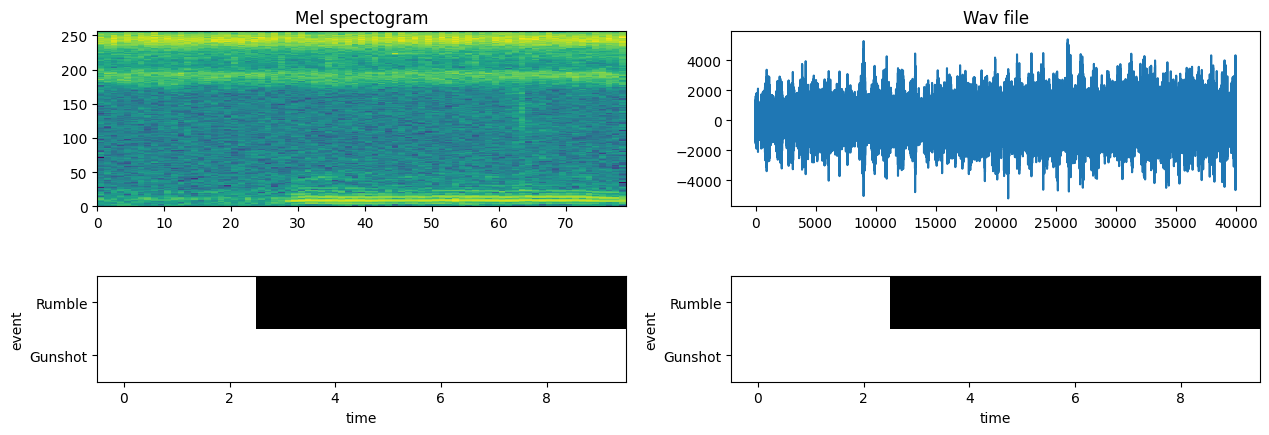

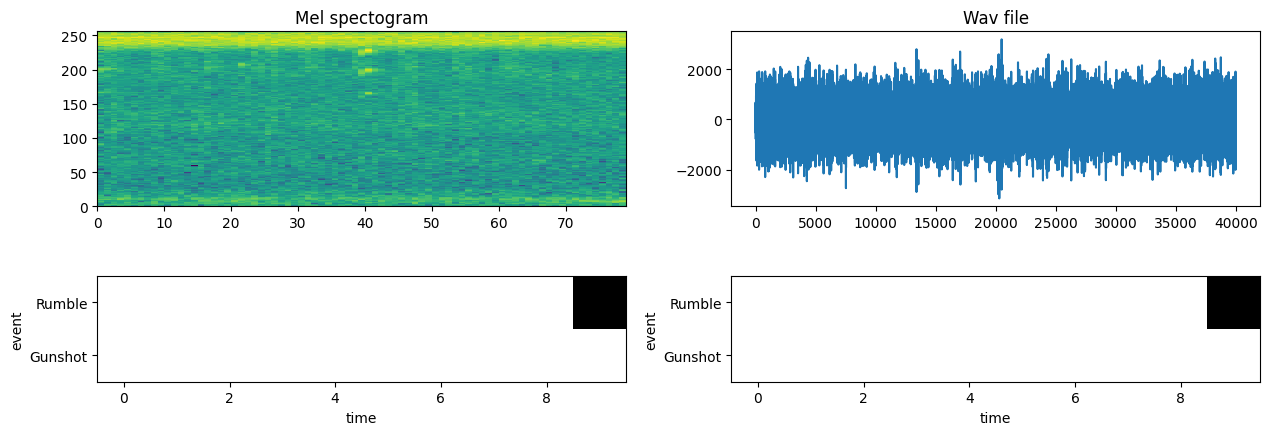

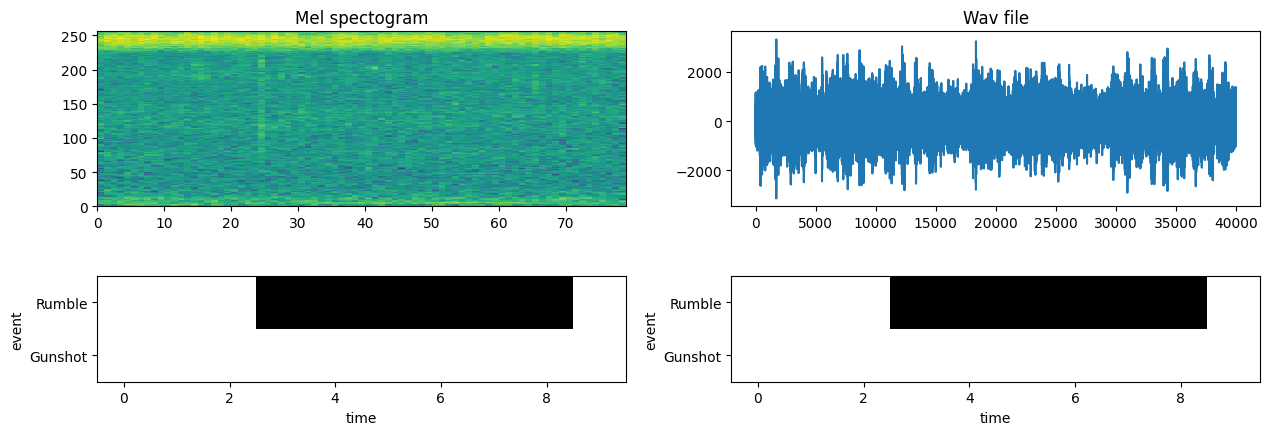

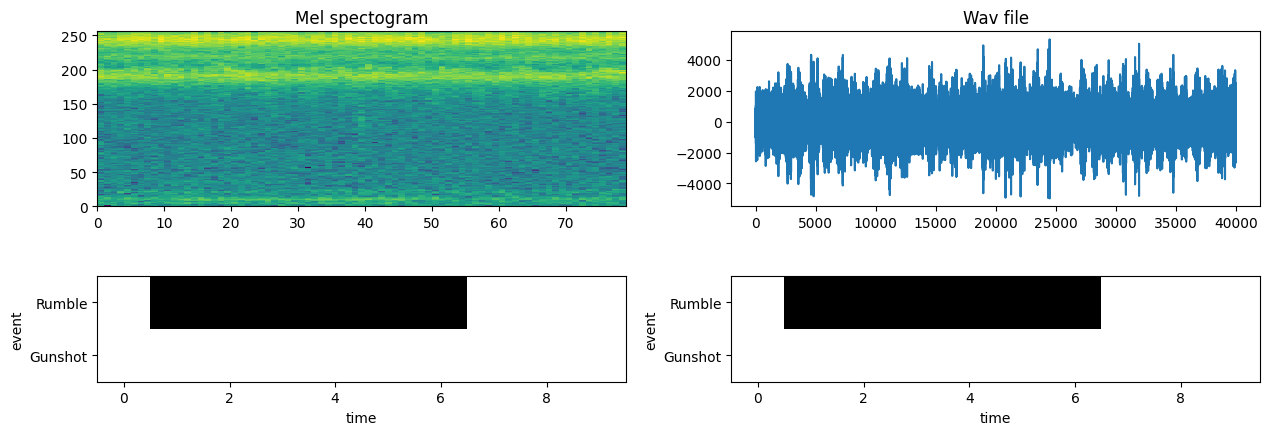

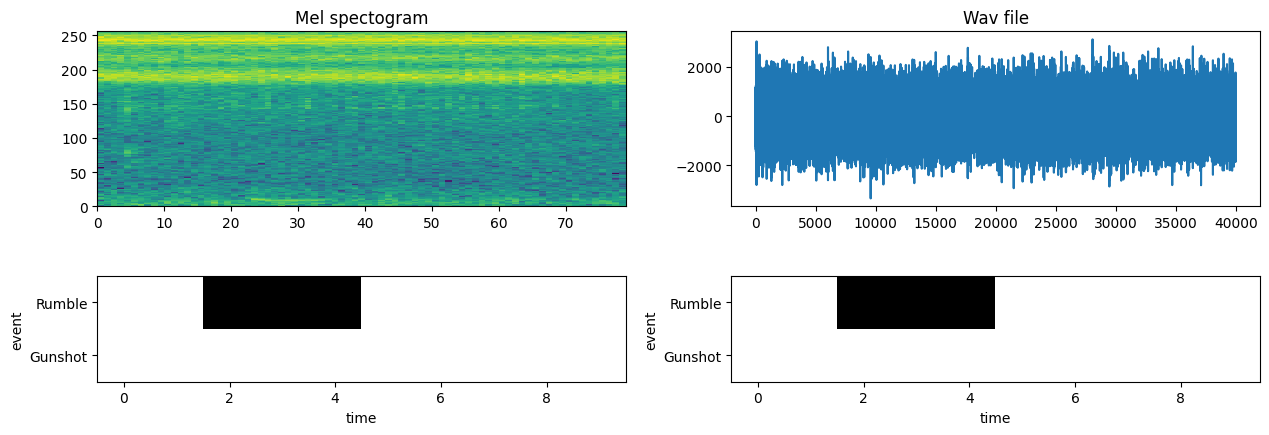

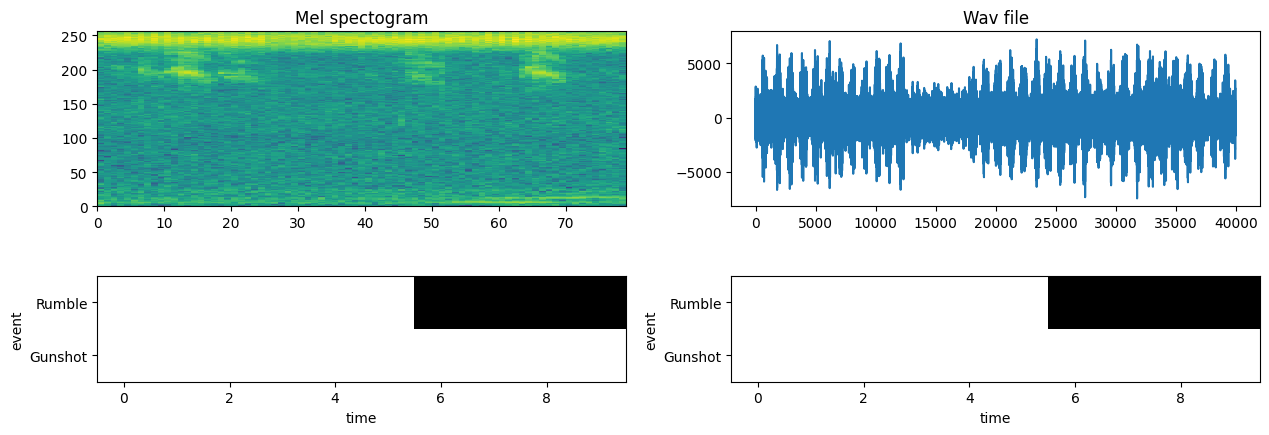

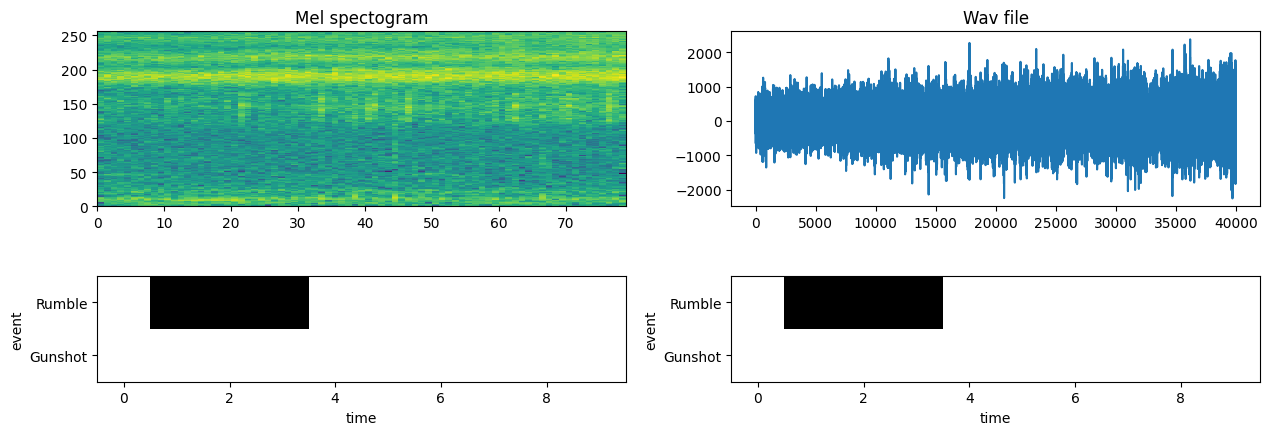

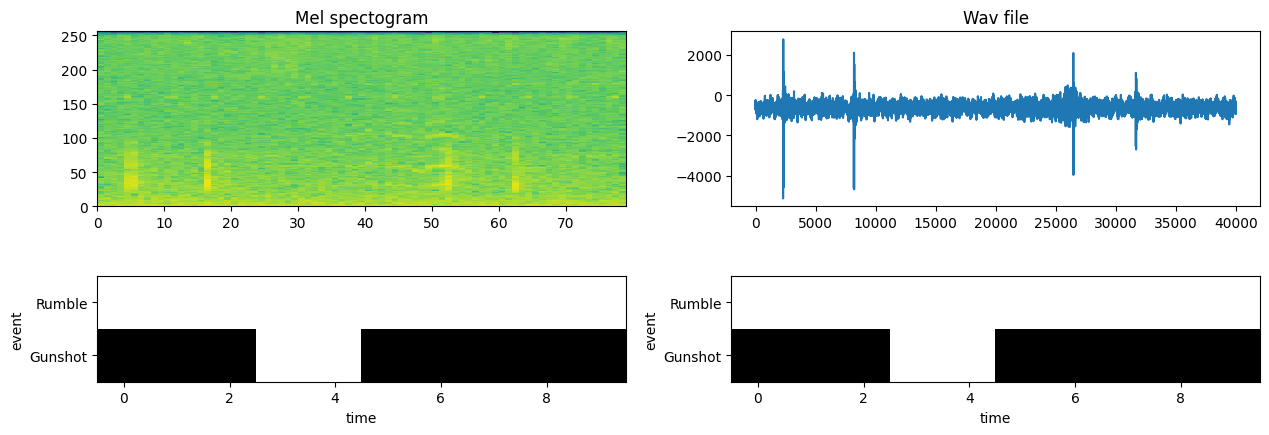

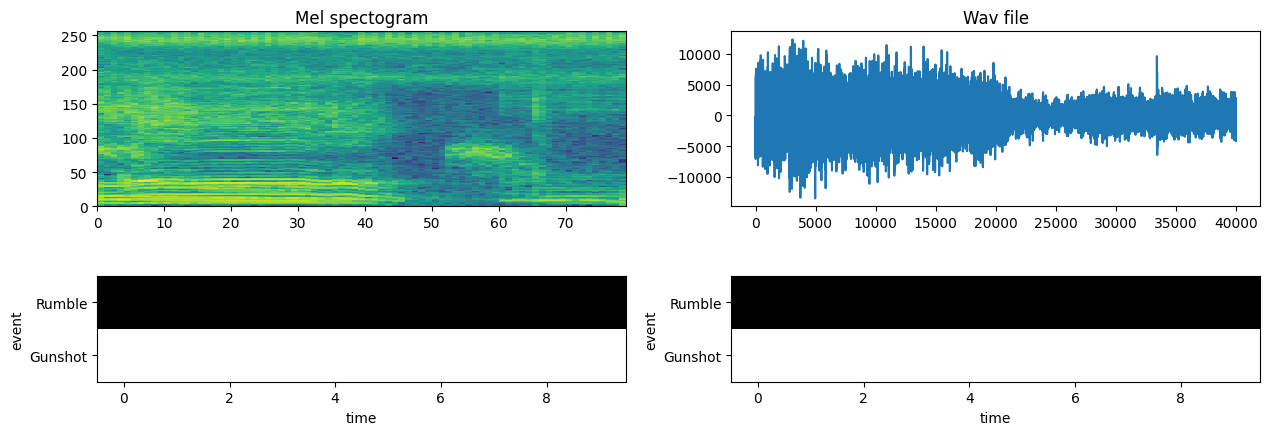

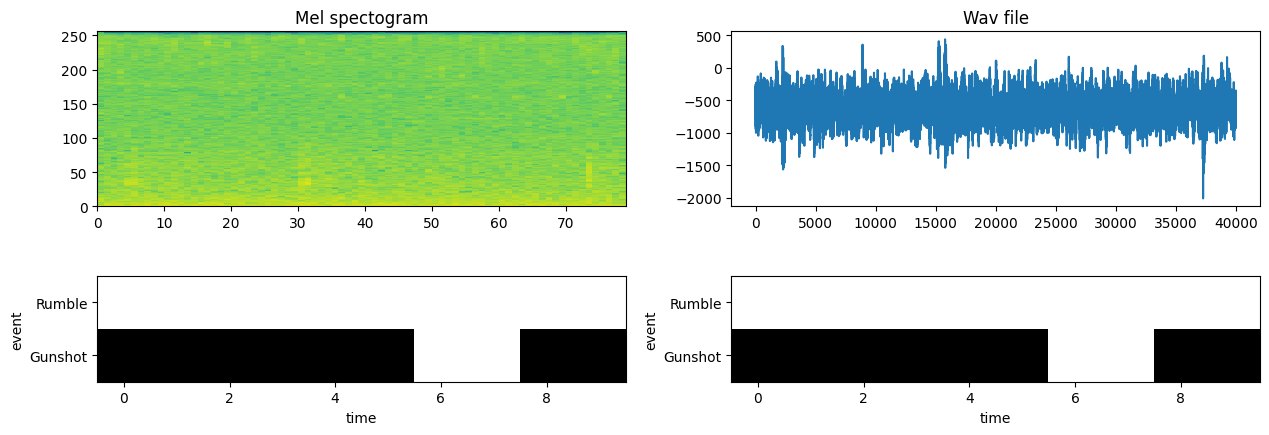

In [10]:
from IPython.core.display_functions import display
import numpy as np
import torch
import matplotlib.pyplot as plt

import IPython.display as ipd

def show_spectograms(dataset: AudioDataset, seed=42):
    '''
    Show spectogram of the first batch and play the sound
    '''

    np.seed = seed
    indices = np.random.randint(0, len(dataset), 5)

    for i in indices:
        sample_rate, data, label = dataset[i]
        data = torch.tensor(data).float()
        mel = pipeline(data)


        fig, axs = plt.subplots(2, 2, figsize=(15, 5))

        axs[0, 0].pcolormesh(np.log10(mel.numpy()),cmap='viridis')


        axs[0, 0].set_title('Mel spectogram')
        axs[0, 1].plot(data)
        axs[0, 1].set_title('Wav file')




        axs[1, 1].imshow(label, cmap='binary', interpolation='nearest')
        labels = ['Rumble', 'Gunshot']
        axs[1, 0].set_yticks([0, 1])
        axs[1, 0].set_yticklabels(labels)
        axs[1, 0].set_ylabel('event')
        axs[1, 0].set_xlabel('time')

        axs[1, 1].set_yticks([0, 1])
        axs[1, 1].set_ylabel('event')
        axs[1, 1].set_xlabel('time')

        axs[1, 1].set_yticklabels(labels)
        axs[1, 0].imshow(label, cmap='binary', interpolation='nearest')

        display(ipd.Audio(data, rate=sample_rate))

        plt.show()




show_spectograms(dataset)



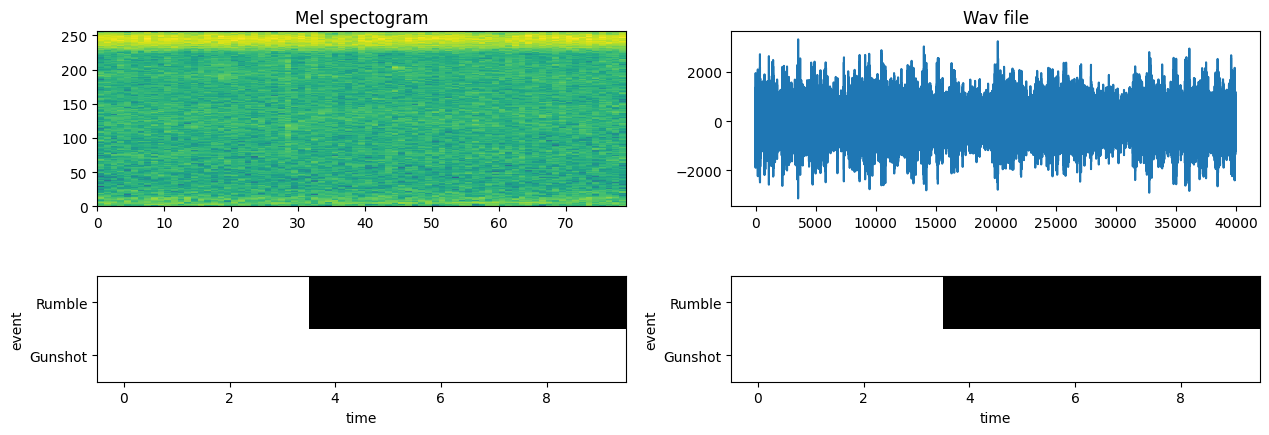

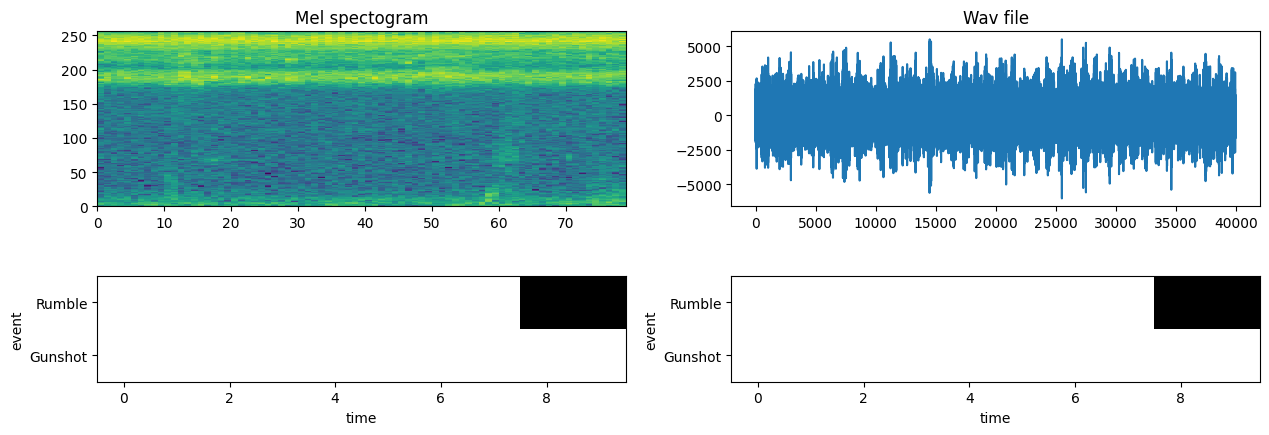

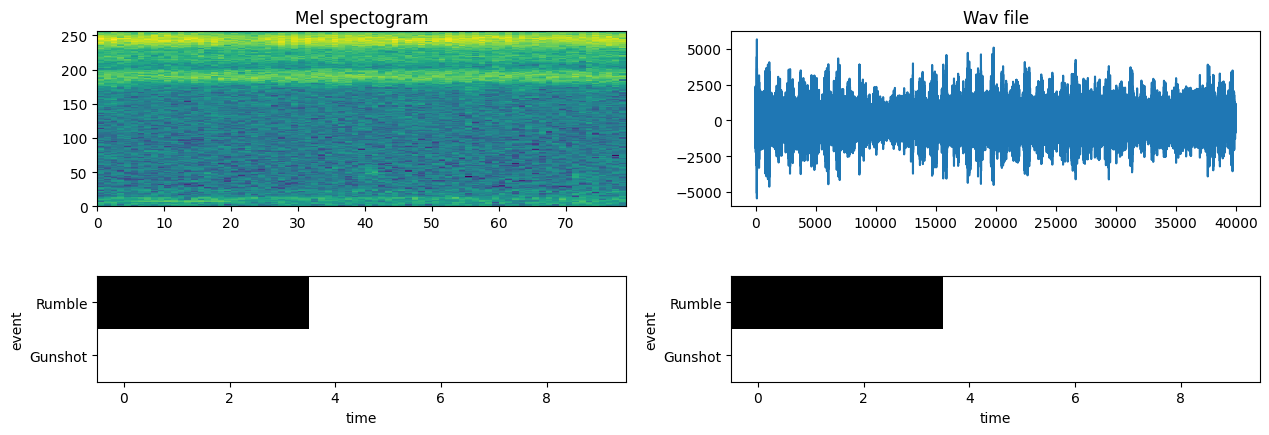

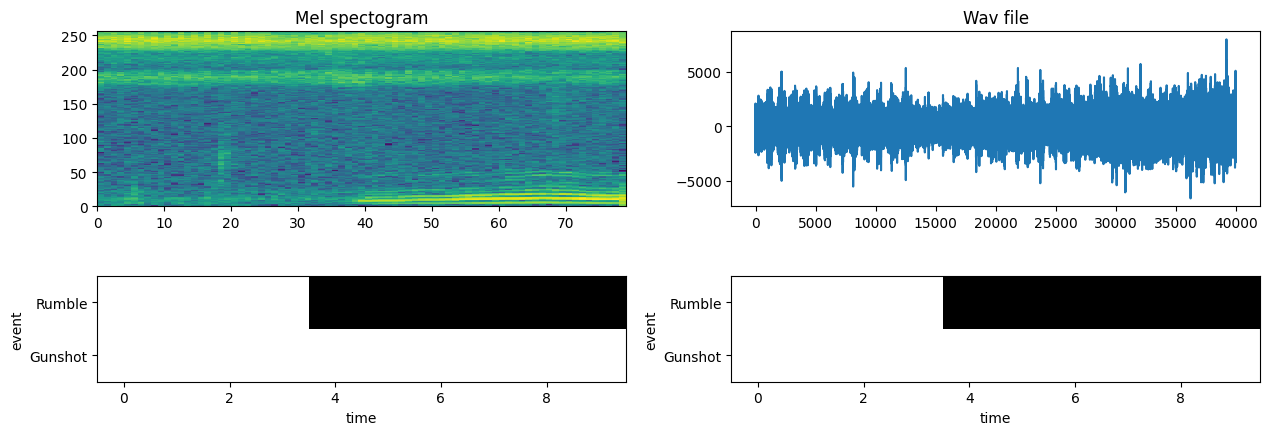

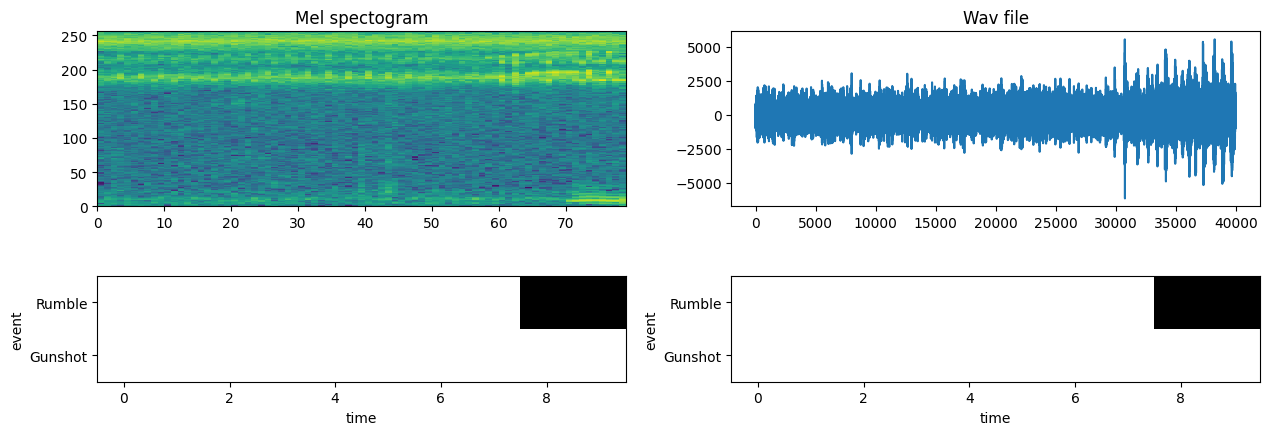

In [11]:
show_spectograms(dataset, seed=3)